# Keywords notebook
This notebook cotains the df refering to the keywords used in order to market the movie. This information is useful in order to build search engines for customers as well as providing information about what may be the most top-trending word describers about a movie.

In [1]:
import pandas as pd
import numpy as np
import json
import ast


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import EDA

EDA lib ready


In [3]:
df = pd.read_csv(r'F:\Programacion\1.BOOTCAMP\data\the-movies-dataset\keywords.csv')
df.head(1)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."


In [4]:
EDA.general_info(df)

-dtype, length and name of columns-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
id          46419 non-null int64
keywords    46419 non-null object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB
None

Index(['id', 'keywords'], dtype='object')

(46419, 2)

-Presence of NaNs in df-
id          False
keywords    False
dtype: bool


In [5]:
df.keywords

0        [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...
1        [{'id': 10090, 'name': 'board game'}, {'id': 1...
2        [{'id': 1495, 'name': 'fishing'}, {'id': 12392...
3        [{'id': 818, 'name': 'based on novel'}, {'id':...
4        [{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...
                               ...                        
46414               [{'id': 10703, 'name': 'tragic love'}]
46415    [{'id': 2679, 'name': 'artist'}, {'id': 14531,...
46416                                                   []
46417                                                   []
46418                                                   []
Name: keywords, Length: 46419, dtype: object

In [4]:
keys = df.copy()

In [7]:
data = keywords.iloc[0,1]
real_json_str = str(data)[1:-1]
real_json_str

"{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}"

In [5]:
keys = EDA.single_condition_separator(keys, ['id', 'keywords'], 'keywords', 'name')
keys

,id,keywords
0,862,"[jealousy, toy, boy, friendship, friends, riva..."
1,8844,"[board game, disappearance, based on children'..."
2,15602,"[fishing, best friend, duringcreditsstinger, o..."
3,31357,"[based on novel, interracial relationship, sin..."
4,11862,"[baby, midlife crisis, confidence, aging, daug..."
...,...,...
46414,439050,[tragic love]
46415,111109,"[artist, play, pinoy]"
46416,67758,[]
46417,227506,[]


In [16]:
keys = EDA.keys_separator(keys, ['id', 'keywords'])
keys

,id,keywords
0,862,jealousy
1,862,toy
2,862,boy
3,862,friendship
4,862,friends
...,...,...
158675,289923,mockumentary
158676,439050,tragic love
158677,111109,artist
158678,111109,play


In [17]:
top_10_keywords = keys['keywords'].value_counts().head(10)
top_10_keywords

woman director      3115
independent film    1930
murder              1308
based on novel       835
musical              734
sex                  685
violence             651
nudity               636
biography            629
revenge              626
Name: keywords, dtype: int64

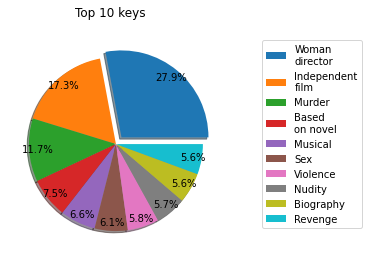

In [21]:
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
labels = 'Woman\ndirector', 'Independent\nfilm', 'Murder', 'Based\non novel', 'Musical', 'Sex', 'Violence', 'Nudity', 'Biography', 'Revenge'

# Plotting graph
plt.pie(top_10_keywords,  autopct='%1.1f%%', startangle=0, explode= explode, shadow= True, pctdistance = 0.9)
plt.suptitle('Top 10 keys', fontsize=12)

# Legend and titles
plt.legend(labels, bbox_to_anchor=(1.15, 1), loc= 'upper left')
plt.suptitle('Top 10 keys', fontsize=12)

plt.show()

In [24]:
mandir = keys['keywords'].loc[keys['keywords'] == 'Male director'].any()

print(f'Presence of a man-director category: {mandir}')

Presence of a man-director category: False


It is worthy of note the existance of a "woman director" category. Firtsly this corroborates the findings of the credits notebook, the number of female directors is so low, that a separate category exists in order to diferenciate a female-directed film from a male-directed one. Secondly this diferentiation is an issue of marketing more than it is representation, as a "male director" does not appear in the data, suggesting that a male-directed film is the norm and not the exception.

In [15]:
# keys df ready for exporting, named keywords_ready
df_save(keys)